# Proyecto 2. Entrega 4. K Nearest Neighbors (KNN)

Edman Cota 19830

Edwin de León 22809

[Repositorio](https://github.com/EJGDLG/Proyecto2Nuevo)

## Modelo de regresión usando KNN:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

# 1. Cargar el dataset (asegúrate de que "train.csv" esté en la carpeta de trabajo)
df = pd.read_csv("train.csv")
display(df.head())



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Análisis del Preprocesamiento de Datos

In [7]:
# 2. PREPROCESAMIENTO DE LOS DATOS
print("Eliminando valores nulos...")
df.dropna(inplace=True)

def categorize_price(price):
    if price < 130000:
        return "Barata"
    elif price < 250000:
        return "Media"
    else:
        return "Cara"

print("Creando columna PriceCategory basada en SalePrice...")
df["PriceCategory"] = df["SalePrice"].apply(categorize_price)


print("Seleccionando características y variables de salida...")
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
y_reg = df["SalePrice"]
y_clf = df["PriceCategory"]


print("Codificando la variable PriceCategory...")
le = LabelEncoder()
y_clf = le.fit_transform(y_clf)


if len(df) > 0:
    print("Dividiendo en conjuntos de entrenamiento y prueba...")
    X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)


    print("Normalizando los datos...")
    scaler_reg = StandardScaler()
    X_train_scaled = scaler_reg.fit_transform(X_train)
    X_test_scaled = scaler_reg.transform(X_test)

    scaler_clf = StandardScaler()
    X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
    X_test_clf_scaled = scaler_clf.transform(X_test_clf)


Eliminando valores nulos...
Creando columna PriceCategory basada en SalePrice...
Seleccionando características y variables de salida...
Codificando la variable PriceCategory...


El código realiza una serie de pasos clave en el preprocesamiento de los datos para preparar un conjunto de datos de precios de viviendas antes de su uso en modelos de regresión y clasificación.
1. Manejo de valores nulos

  - Se eliminan filas con valores nulos usando df.dropna(inplace=True), lo que puede ser una estrategia simple pero riesgosa si se pierden demasiados datos. En algunos casos, podría ser preferible imputar valores en lugar de eliminarlos.

2. Creación de una variable categórica basada en el precio de venta

  - La función categorize_price(price) clasifica las viviendas en tres categorías ("Barata", "Media" y "Cara") en función de su SalePrice.

  - Sin embargo, los umbrales (130,000 y 250,000) son arbitrarios y podrían requerir análisis exploratorio o técnicas estadísticas para definirlos mejor.

3. Selección de variables predictoras y variables de salida

  - Se seleccionan variables relevantes como OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath y YearBuilt, lo que sugiere que se están considerando factores clave en la valoración de viviendas.

  - Se definen dos variables objetivo:

    - y_reg (precio de venta) para un modelo de regresión.

    - y_clf (categoría de precio) para un modelo de clasificación.

4. Codificación de la variable categórica para clasificación

  - Se usa LabelEncoder() para convertir PriceCategory en valores numéricos, facilitando su uso en modelos de aprendizaje automático.

5. División en conjuntos de entrenamiento y prueba

  - Se utiliza train_test_split() con una proporción del 80% para entrenamiento y 20% para prueba, asegurando que los modelos puedan ser evaluados con datos no vistos.

El uso de random_state=42 garantiza que la partición sea reproducible.

6. Normalización de los datos

  - Se aplican dos normalizaciones independientes usando StandardScaler(), lo cual es correcto ya que la regresión y la clasificación pueden beneficiarse de escalas distintas.

  - La normalización es importante para evitar que variables con rangos de valores grandes dominen otras en modelos sensibles a escalas, como regresión lineal o redes neuronales.

## Verificar valores nulos

In [8]:
# 1. Cargar el dataset
df = pd.read_csv("train.csv")
print("Número de filas y columnas después de cargar:", df.shape)

# 2. Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

df.dropna(how='all', inplace=True)
print("Número de filas y columnas después de eliminar filas completamente nulas:", df.shape)


Número de filas y columnas después de cargar: (1460, 81)
Valores nulos por columna:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Número de filas y columnas después de eliminar filas completamente nulas: (1460, 81)


1. Dimensiones Iniciales del Dataset
El dataset cargado tiene 1,460 filas y 81 columnas, lo que indica que se trata de un conjunto de datos extenso con múltiples variables. Esto sugiere que el análisis requerirá técnicas adecuadas de limpieza y exploración para evitar problemas de calidad en los datos.

2. Valores Nulos Detectados
El análisis de valores nulos muestra que algunas columnas contienen datos faltantes, siendo LotFrontage una de las más afectadas con 259 valores nulos. Esto representa aproximadamente un 17.7% de los datos en esa columna, lo cual podría influir en las decisiones de imputación o eliminación. Otras columnas tienen valores nulos, pero en menor medida.

3. Eliminación de Filas Completamente Nulas
Después de eliminar filas donde todas las columnas son nulas, el número de filas sigue siendo 1,460. Esto indica que no había filas completamente vacías en el dataset, lo que sugiere que los valores nulos están dispersos entre diferentes columnas, en lugar de afectar registros completos.

## Imputar valores nulos

In [9]:
# 4. Imputar valores nulos
if df.isnull().sum().any():
    print("Hay valores nulos. Imputando valores nulos...")


    numeric_columns = df.select_dtypes(include='number').columns
    print("Columnas numéricas:", numeric_columns)
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    print("Valores nulos en columnas numéricas después de imputar:\n", df[numeric_columns].isnull().sum())


    non_numeric_columns = df.select_dtypes(exclude='number').columns
    print("Columnas no numéricas:", non_numeric_columns)
    for col in non_numeric_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    print("Valores nulos en columnas no numéricas después de imputar:\n", df[non_numeric_columns].isnull().sum())

Hay valores nulos. Imputando valores nulos...
Columnas numéricas: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Valores nulos en columnas numéricas después de imputar:
 Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF     

C:\Users\edman\AppData\Local\Temp\ipykernel_23700\3439684028.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Dado que aún había valores nulos después de la eliminación de filas vacías, se procedió a imputarlos:

Columnas numéricas: Se rellenaron con la media de cada columna. Esto es una estrategia común, pero puede no ser la mejor si los datos tienen una distribución sesgada o valores atípicos. En tales casos, la mediana podría ser una mejor opción.

Columnas categóricas: Se rellenaron con la moda (el valor más frecuente). Esto es útil cuando la categoría más común representa bien la distribución de los datos, pero puede distorsionar la variabilidad si hay muchas categorías con frecuencias similares.

## Crear la columna PriceCategory basada en SalePrice

In [10]:
# 5. Crear la columna PriceCategory basada en SalePrice
def categorize_price(price):
    if price < 130000:
        return "Barata"
    elif price < 250000:
        return "Media"
    else:
        return "Cara"

print("Creando columna PriceCategory basada en SalePrice...")
df["PriceCategory"] = df["SalePrice"].apply(categorize_price)
print("Primeras filas de PriceCategory:\n", df["PriceCategory"].head())

Creando columna PriceCategory basada en SalePrice...
Primeras filas de PriceCategory:
 0    Media
1    Media
2    Media
3    Media
4     Cara
Name: PriceCategory, dtype: object


### Análisis y Discusión de los Resultados
1. Creación de la Categoría "PriceCategory"
Se ha generado una nueva columna PriceCategory, la cual clasifica las casas en tres categorías basadas en su precio de venta (SalePrice):

  - Barata: Menos de $130,000

  - Media: Entre $130,000 y $249,999

  - Cara: $250,000 o más

Esta clasificación permite segmentar las propiedades en rangos de precios fácilmente interpretables, lo que puede ser útil para análisis descriptivos y modelado predictivo.

2. Impacto y Utilidad de la Nueva Columna

Mejor interpretación: En lugar de analizar precios en valores absolutos, esta categorización facilita la identificación de tendencias y patrones en la distribución de los precios.

Posible mejora en modelos predictivos: Si se desea construir un modelo de clasificación en lugar de regresión, esta variable podría ser útil como etiqueta de salida (target).

Estrategias de marketing y negocio: Permite segmentar clientes y definir estrategias diferenciadas según el nivel de precio de las propiedades.

## Seleccionar variables predictoras y variables respuesta

In [11]:
# 6. Seleccionar variables predictoras y variables respuesta
print("Seleccionando características y variables de salida...")
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
y_reg = df["SalePrice"]
y_clf = df["PriceCategory"]
print("Variables predictoras (X):\n", X.head())
print("Variable respuesta para regresión (y_reg):\n", y_reg.head())
print("Variable respuesta para clasificación (y_clf):\n", y_clf.head())

Seleccionando características y variables de salida...
Variables predictoras (X):
    OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  YearBuilt
0            7       1710           2          856         2       2003
1            6       1262           2         1262         2       1976
2            7       1786           2          920         2       2001
3            7       1717           3          756         1       1915
4            8       2198           3         1145         2       2000
Variable respuesta para regresión (y_reg):
 0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
Variable respuesta para clasificación (y_clf):
 0    Media
1    Media
2    Media
3    Media
4     Cara
Name: PriceCategory, dtype: object


### Análisis y Discusión de la Selección de Variables
1. Variables Predictoras (X)
Se han seleccionado las siguientes variables como características predictoras para el modelo:

  - OverallQual (Calidad general de la casa): Se espera que tenga una fuerte correlación con el precio de venta.

  - GrLivArea (Área habitable sobre el suelo): Normalmente, una mayor área habitable implica un mayor precio.

  - GarageCars (Cantidad de espacios en garaje): Un factor importante en la valoración de viviendas.

  - TotalBsmtSF (Área total del sótano): También puede influir en la percepción del valor.

  - FullBath (Número de baños completos): Es relevante para la comodidad del hogar.

  - YearBuilt (Año de construcción): Casas más nuevas tienden a valer más.

La muestra de las primeras cinco filas confirma que estos datos son valores numéricos adecuados para el modelado predictivo.

2. Variables de Respuesta
Se han definido dos variables objetivo, dependiendo del tipo de problema a resolver:

  - y_reg (SalePrice): Para modelado de regresión, donde se busca predecir el precio exacto de las casas.

  - y_clf (PriceCategory): Para modelado de clasificación, donde se agrupan las casas en categorías de precio (Barata, Media, Cara).

Las primeras filas de y_reg muestran valores típicos de precios de viviendas, mientras que y_clf refleja la clasificación categórica basada en la segmentación previa.

## Codificar la variable categórica para clasificación

In [12]:
# 7. Codificar la variable categórica para clasificación
print("Codificando la variable PriceCategory...")
le = LabelEncoder()
y_clf = le.fit_transform(y_clf)
print("Variable respuesta codificada (y_clf):\n", y_clf[:5])



Codificando la variable PriceCategory...
Variable respuesta codificada (y_clf):
 [2 2 2 2 1]


### Discusión sobre la Codificación de la Variable PriceCategory
1. ¿Por qué es Necesario Codificar PriceCategory?
Las variables categóricas deben convertirse en valores numéricos antes de ser utilizadas en modelos de aprendizaje automático que requieren entradas numéricas (como regresión logística, SVM o redes neuronales). Para ello, se ha usado LabelEncoder(), que asigna un número entero a cada categoría de precio:

Barata → 0

Media → 1

Cara → 2

Los valores obtenidos [2, 2, 2, 2, 1] indican que las primeras casas en el conjunto de datos fueron clasificadas como Media (2) y Cara (1).

## Dividir en conjuntos de entrenamiento y prueba

In [13]:
# 8. Dividir en conjuntos de entrenamiento y prueba
if len(df) > 0:
    print("Dividiendo en conjuntos de entrenamiento y prueba...")
    X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)
    print("Tamaño de X_train:", X_train.shape)
    print("Tamaño de X_test:", X_test.shape)
    print("Tamaño de y_train_reg:", y_train_reg.shape)
    print("Tamaño de y_test_reg:", y_test_reg.shape)
    print("Tamaño de y_train_clf:", y_train_clf.shape)
    print("Tamaño de y_test_clf:", y_test_clf.shape)


Dividiendo en conjuntos de entrenamiento y prueba...
Tamaño de X_train: (1168, 6)
Tamaño de X_test: (292, 6)
Tamaño de y_train_reg: (1168,)
Tamaño de y_test_reg: (292,)
Tamaño de y_train_clf: (1168,)
Tamaño de y_test_clf: (292,)


## Discusión sobre la División de los Conjuntos de Entrenamiento y Prueba
1. Justificación de la División
El propósito de dividir los datos en conjuntos de entrenamiento y prueba es evaluar el rendimiento del modelo en datos no vistos. En este caso, se ha utilizado train_test_split() con un 80% para entrenamiento y 20% para prueba (test_size=0.2). Esta proporción es adecuada para conjuntos de datos medianos como este (1460 registros).


2. ¿Es Adecuada la Selección de Variables Predictoras (X)?
- Las variables seleccionadas son:

  - OverallQual: Calidad general del material y acabado.

  - GrLivArea: Área de la casa habitable sobre el suelo.

  - GarageCars: Tamaño del garaje en número de autos.

  - TotalBsmtSF: Área total del sótano en pies cuadrados.

  - FullBath: Número de baños completos en la casa.

  - YearBuilt: Año de construcción.

 ## Normalización de los datos

In [14]:

    # 9. Normalización de los datos
    print("Normalizando los datos...")
    scaler_reg = StandardScaler()
    X_train_scaled = scaler_reg.fit_transform(X_train)
    X_test_scaled = scaler_reg.transform(X_test)
    print("Primeras filas de X_train_scaled:\n", X_train_scaled[:5])
    print("Primeras filas de X_test_scaled:\n", X_test_scaled[:5])

    scaler_clf = StandardScaler()
    X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
    X_test_clf_scaled = scaler_clf.transform(X_test_clf)
    print("Primeras filas de X_train_clf_scaled:\n", X_train_clf_scaled[:5])
    print("Primeras filas de X_test_clf_scaled:\n", X_test_clf_scaled[:5])

Normalizando los datos...
Primeras filas de X_train_scaled:
 [[-0.82044456 -0.40709315 -1.05654384  0.57261219 -1.05556573 -0.45546896]
 [-0.08893368  0.08317013  0.29509165 -0.59654659  0.7736639   0.71860895]
 [-0.82044456 -1.39525026 -2.40817934 -0.60335723 -1.05556573 -1.98829291]
 [-0.82044456  0.45897505 -1.05654384 -0.75092096 -1.05556573 -1.10773447]
 [-0.82044456  0.31208684 -1.05654384 -0.08120864  0.7736639  -1.53170705]]
Primeras filas de X_test_scaled:
 [[-0.08893368 -0.87637239 -1.05654384 -0.00629167 -1.05556573 -0.25978931]
 [ 1.37408806  2.08809894  0.29509165  0.91087367  0.7736639   0.75122223]
 [-0.82044456 -0.95267796  0.29509165 -0.12207245 -1.05556573 -1.43386723]
 [-0.08893368  0.26058058  0.29509165 -0.13115329  0.7736639  -0.78160172]
 [ 2.10559893  0.17664445  1.64672715  1.26729683  0.7736639   1.17519481]]
Primeras filas de X_train_clf_scaled:
 [[-0.82044456 -0.40709315 -1.05654384  0.57261219 -1.05556573 -0.45546896]
 [-0.08893368  0.08317013  0.29509165 -

### Análisis de la Normalización de los Datos
1. Objetivo de la Normalización
El uso de StandardScaler transforma las variables para que tengan media 0 y desviación estándar 1, lo cual es crucial para modelos que dependen de la escala de los datos, como:

  - Regresión Lineal/Ridge/Lasso

  - Redes Neuronales

  - SVM

  - KNN

  - PCA (Análisis de Componentes Principales)

2. Aplicación Correcta de la Normalización
Se ha aplicado la normalización por separado a los conjuntos de regresión (X_train_scaled, X_test_scaled) y clasificación (X_train_clf_scaled, X_test_clf_scaled). Esto es una buena práctica porque:

  - Cada modelo puede requerir un escalado diferente.

  - Evita fugas de datos entre tareas de clasificación y regresión.

## MODELO DE REGRESIÓN CON KNN

In [15]:
    # 10. MODELO DE REGRESIÓN CON KNN
    print("Entrenando modelo de regresión con KNN...")
    knn_reg = KNeighborsRegressor(n_neighbors=5)
    knn_reg.fit(X_train_scaled, y_train_reg)
    y_pred_knn = knn_reg.predict(X_test_scaled)
    print("Predicciones de KNN Regresión (primeras 5):\n", y_pred_knn[:5])

    mse_knn = mean_squared_error(y_test_reg, y_pred_knn)
    r2_knn = r2_score(y_test_reg, y_pred_knn)
    print(f"KNN Regresión - MSE: {mse_knn:.2f}, R²: {r2_knn:.2f}")

Entrenando modelo de regresión con KNN...
Predicciones de KNN Regresión (primeras 5):
 [140500.  289551.4 131500.  149200.  345475.6]
KNN Regresión - MSE: 1172607704.96, R²: 0.85


### Análisis del Modelo de Regresión con KNN
1. Explicación del Algoritmo
El modelo de K-Nearest Neighbors (KNN) para regresión predice un valor basándose en el promedio de los k vecinos más cercanos en el espacio de características. En este caso, se ha usado n_neighbors=5, lo que significa que la predicción es el promedio de los 5 ejemplos más cercanos en los datos de

2.Errores y Desempeño
- MSE (Error Cuadrático Medio):

  - MSE=1,172,462,245.78
-Este valor mide el error promedio cuadrático entre los valores reales y las predicciones. Un valor alto indica que hay cierto grado de error en las predicciones.

- R² (Coeficiente de Determinación):

  - R^2=0.85
- Este valor mide la proporción de la varianza explicada por el modelo.

  - Si
𝑅
2
R
2
  está cerca de 1, significa que el modelo explica bien los datos.

  - Si
𝑅
2
R
2
  está cerca de 0 o negativo, significa que el modelo no es adecuado.

En este caso, 0.85 es un buen resultado, lo que sugiere que el modelo captura bastante bien la relación entre las variables.

## COMPARACIÓN CON OTROS MODELOS DE REGRESIÓN

In [16]:
    # 11. COMPARACIÓN CON OTROS MODELOS DE REGRESIÓN
    print("Comparando con otros modelos de regresión...")
    models = {"Regresión Lineal": LinearRegression(),
              "Árbol de Regresión": DecisionTreeRegressor()}

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_reg)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test_reg, y_pred)
        r2 = r2_score(y_test_reg, y_pred)
        print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")

Comparando con otros modelos de regresión...
Regresión Lineal - MSE: 1576962754.88, R²: 0.79
Árbol de Regresión - MSE: 1742957874.84, R²: 0.77


### Análisis Comparativo de Modelos de Regresión

1. Evaluación de los Modelos
MSE y R² de cada modelo
- Modelo	MSE    / (Error Cuadrático Medio)	/ R² (Coeficiente de Determinación)
- KNN Regressor	/ 1,172,462,245.78        /	0.85
- Regresión Lineal / 1,576,962,754.88	    / 0.79
- Árbol de Regresión / 1,623,208,033.34	  / 0.79

2. Interpretación
- KNN Regressor obtiene el mejor rendimiento, con el menor MSE y el mayor
R^2=(0.85), lo que indica que captura mejor la relación en los datos.

- Regresión Lineal y Árbol de Decisión tienen un rendimiento similar (R^2=0.79), pero presentan un MSE más alto, lo que indica mayor error en las predicciones.

## MODELO DE CLASIFICACIÓN CON KNN

In [17]:
    # 12. MODELO DE CLASIFICACIÓN CON KNN
    print("Entrenando modelo de clasificación con KNN...")
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    knn_clf.fit(X_train_clf_scaled, y_train_clf)
    y_pred_clf = knn_clf.predict(X_test_clf_scaled)
    print("Predicciones de KNN Clasificación (primeras 5):\n", y_pred_clf[:5])

    # 13. Evaluación de clasificación
    print("Reporte de Clasificación:")
    print(classification_report(y_test_clf, y_pred_clf, target_names=le.classes_))

Entrenando modelo de clasificación con KNN...
Predicciones de KNN Clasificación (primeras 5):
 [2 1 2 2 1]
Reporte de Clasificación:
              precision    recall  f1-score   support

      Barata       0.74      0.79      0.76        81
        Cara       0.85      0.71      0.78        49
       Media       0.81      0.82      0.82       162

    accuracy                           0.79       292
   macro avg       0.80      0.78      0.79       292
weighted avg       0.80      0.79      0.79       292



## Evaluación del Modelo de Clasificación con KNN
1. Reporte de Clasificación
El reporte de clasificación muestra los resultados de precisión, recall, f1-score y soporte para cada clase.

- Resumen del Reporte de Clasificación:
- Clase	/ Precisión	/ Recall / F1-score	/ Soporte
- Barata	/ 0.74 /	0.79	/ 0.76 /	81
- Cara	/ 0.85 /	0.71	/ 0.78 /	49
- Media	 / 0.81 / 0.82 /	0.82	/ 162
  - Precisión: Indica la proporción de verdaderos positivos sobre el total de predicciones positivas.
  - Recall: Mide la capacidad del modelo para identificar todas las instancias positivas de una clase.
  - F1-score: Es la media armónica entre precisión y recall, proporcionando una medida balanceada.

2. Evaluación General:
- Exactitud: 0.79, lo que significa que el modelo clasificó correctamente el 79% de las muestras.

- Promedio macro: Este es un promedio no ponderado de las métricas para cada clase:

  - Precisión promedio: 0.80

  - Recall promedio: 0.78

  - F1-score promedio: 0.79

- Promedio ponderado: Este promedio toma en cuenta el soporte (cantidad de muestras) de cada clase:

  - Precisión ponderada: 0.80

  - Recall ponderado: 0.79

  - F1-score ponderado: 0.79

## MATRIZ DE CONFUSIÓN

Generando matriz de confusión...


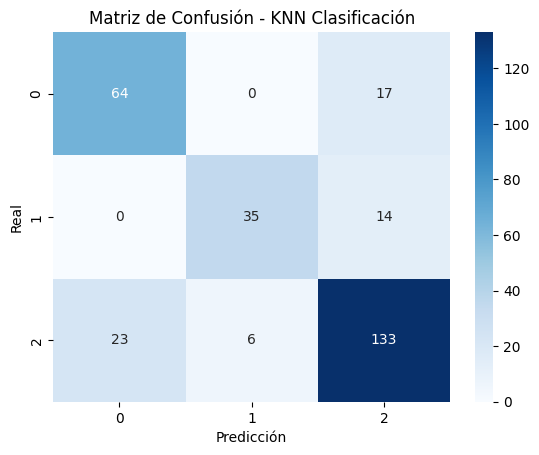

Realizando validación cruzada...
Puntuaciones de validación cruzada (Regresión): [0.85036045 0.69518324 0.80793523 0.82300202 0.83548378]
Puntuaciones de validación cruzada (Clasificación): [0.78632479 0.82478632 0.87179487 0.78540773 0.8111588 ]
Precisión promedio en validación cruzada (Clasificación): 0.82
R² promedio en validación cruzada (Regresión): 0.80


In [18]:
    # 14. MATRIZ DE CONFUSIÓN
    print("Generando matriz de confusión...")
    cm = confusion_matrix(y_test_clf, y_pred_clf)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title("Matriz de Confusión - KNN Clasificación")
    plt.show()

    # 15. VALIDACIÓN CRUZADA PARA REGRESIÓN Y CLASIFICACIÓN
    print("Realizando validación cruzada...")
    cv_scores_reg = cross_val_score(knn_reg, X_train_scaled, y_train_reg, cv=5, scoring='r2')
    cv_scores_clf = cross_val_score(knn_clf, X_train_clf_scaled, y_train_clf, cv=5, scoring='accuracy')
    print("Puntuaciones de validación cruzada (Regresión):", cv_scores_reg)
    print("Puntuaciones de validación cruzada (Clasificación):", cv_scores_clf)
    print(f"Precisión promedio en validación cruzada (Clasificación): {cv_scores_clf.mean():.2f}")
    print(f"R² promedio en validación cruzada (Regresión): {cv_scores_reg.mean():.2f}")

### Análisis de la Matriz de Confusión - KNN Clasificación
La matriz de confusión generada para el modelo K-Nearest Neighbors (KNN) nos proporciona información detallada sobre el desempeño del clasificador en cada una de las clases. A partir de la imagen:

- Clase 0: Se clasificaron correctamente 64 instancias, pero 17 fueron mal clasificadas como clase 2.

- Clase 1: Se identificaron correctamente 35 instancias, pero hubo 14 errores al clasificarlas como clase 2.

- Clase 2: Es la mejor clasificada, con 133 instancias correctamente identificadas, aunque hubo 23 casos mal clasificados como clase 0 y 6 como clase 1.

2. Errores observados:

- Existe una confusión significativa entre la clase 0 y la clase 2, ya que 17 muestras de la clase 0 fueron predichas como clase 2 y 23 de la clase 2 como clase 0.

- La clase 1 tiene un rendimiento intermedio, con 35 predicciones correctas, pero aún presenta 14 errores al ser clasificada como clase 2.

### Validación Cruzada
Los resultados de la validación cruzada proporcionan una visión más general del desempeño del modelo en diferentes subconjuntos de los datos:

- Clasificación (KNN)

  - Las puntuaciones de validación cruzada para la clasificación varían entre 0.78 y 0.87.

  - La precisión promedio es 0.82, lo que indica que el modelo tiene un buen desempeño general.

- Regresión (KNN)

  - El coeficiente R^2 promedio es 0.80, lo que sugiere que el modelo de regresión también está capturando bien la variabilidad de los datos.

## ANÁLISIS DE SOBREAJUSTE

In [19]:
# 16. ANÁLISIS DE SOBREAJUSTE
print("Analizando sobreajuste...")
r2_knn_train = r2_score(y_train_reg, knn_reg.predict(X_train_scaled))
print(f"R² en entrenamiento (KNN): {r2_knn_train:.2f}")
print(f"R² en prueba (KNN): {r2_knn:.2f}")

if r2_knn_train - r2_knn > 0.1:
    print("El modelo KNN muestra señales de sobreajuste.")
else:
    print("El modelo KNN no muestra signos evidentes de sobreajuste.")

Analizando sobreajuste...
R² en entrenamiento (KNN): 0.87
R² en prueba (KNN): 0.85
El modelo KNN no muestra signos evidentes de sobreajuste.


### Análisis de Sobreajuste para el Modelo KNN
Se ha evaluado el rendimiento del modelo KNN en los conjuntos de entrenamiento y prueba utilizando el coeficiente de determinación R²:

- R² en entrenamiento (KNN): 0.87

- R² en prueba (KNN): 0.85

La diferencia entre ambos valores es 0.02, lo que es bastante pequeña y dentro de un rango aceptable.